# Setup

In [1]:
# Structures to make easier for us to perform the procedures
from src.entities import EnvironmentConfiguration
environment_configuration = EnvironmentConfiguration()

In [2]:
# Import raw data:
import pandas as pd
raw_data = pd.read_csv(environment_configuration.raw_data_folder)

In [3]:
CUST_ID = raw_data["CUST_ID"]

In [4]:
raw_data = raw_data.drop(["CUST_ID"], axis= 1)

# Evaluation Explanation

# Experiment 1

## Objective

Test if we can create a minimum viable vanilla model

## Data Pipeline

Just `drop_null_values`, and `scale_values`

In [13]:
from src.preprocessing_pipelines.preprocessing_pipelines import robust_scale_dataframe
data_without_null = raw_data.dropna()
robust_scaled_df, robust_scaler = robust_scale_dataframe(data_without_null)

## Model Training

### K-means

#### Without Scaling

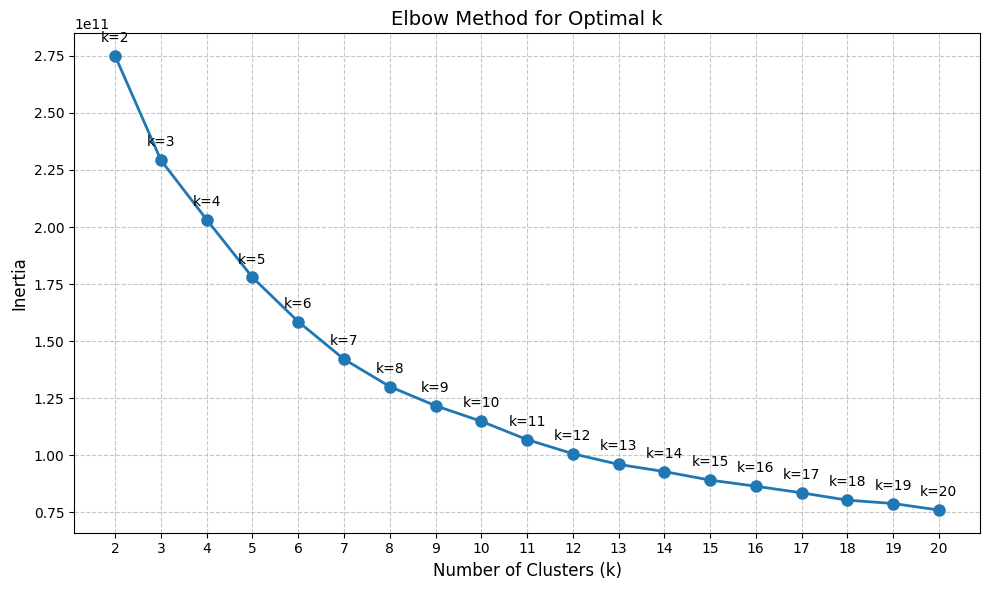

In [9]:
from src.model_selection import perform_kmeans_analysis
metrics_df, fig = perform_kmeans_analysis(data= data_without_null, k_max = 20)

In [10]:
metrics_df

,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,2.749537e+11,0.512267,3501.048329,1.244618
1,3,2.292580e+11,0.464959,2959.549597,1.194736
2,4,2.032216e+11,0.389675,2594.193060,1.311682
3,5,1.779168e+11,0.394694,2529.006928,1.188713
4,6,1.585275e+11,0.370033,2481.504890,1.233009
5,7,1.420687e+11,0.370653,2473.835678,1.117569
6,8,1.300661e+11,0.383338,2429.580000,1.100921
7,9,1.216712e+11,0.351838,2346.705820,1.112940
8,10,1.148435e+11,0.360775,2266.695761,1.107353
9,11,1.068308e+11,0.365248,2257.473185,1.047497


#### With Robust Scaling

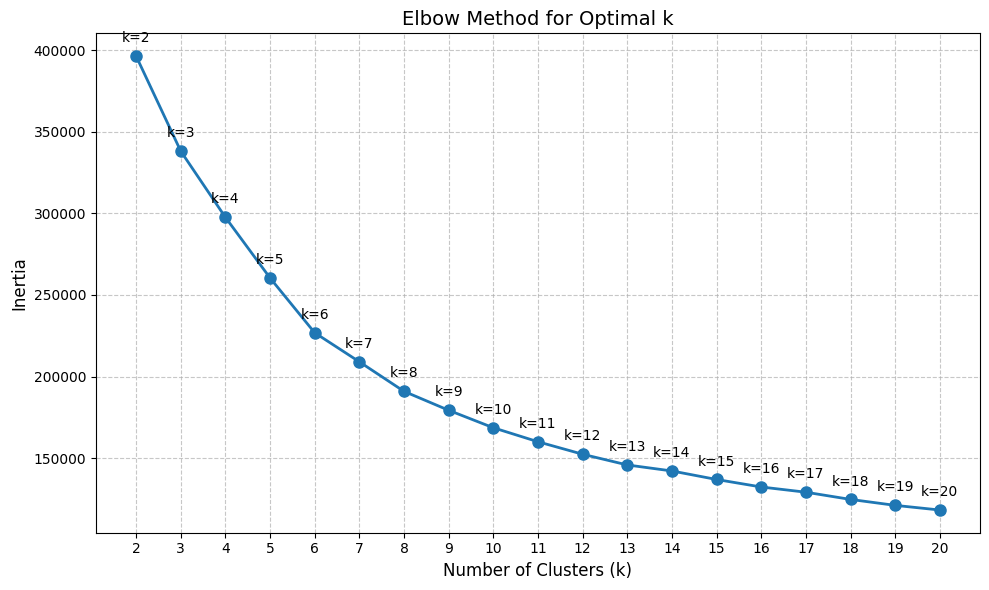

In [7]:
from src.model_selection import perform_kmeans_analysis
metrics_df, fig = perform_kmeans_analysis(data= robust_scaled_df, k_max = 20)

In [8]:
metrics_df

,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,396337.502547,0.664673,1617.273761,1.458868
1,3,338096.128322,0.590457,1691.397344,1.050498
2,4,297569.065692,0.270658,1672.896685,1.151797
3,5,260424.216824,0.285964,1741.227366,1.094824
4,6,226858.775815,0.304474,1854.276220,1.116378
5,7,209071.126717,0.311742,1798.859689,1.047295
6,8,190965.735589,0.285677,1804.727955,1.024685
7,9,179385.907347,0.288378,1750.493120,1.095200
8,10,168675.085521,0.278535,1715.467630,1.140652
9,11,160099.985043,0.291269,1672.623004,1.122372


### Agglomerative Clustering

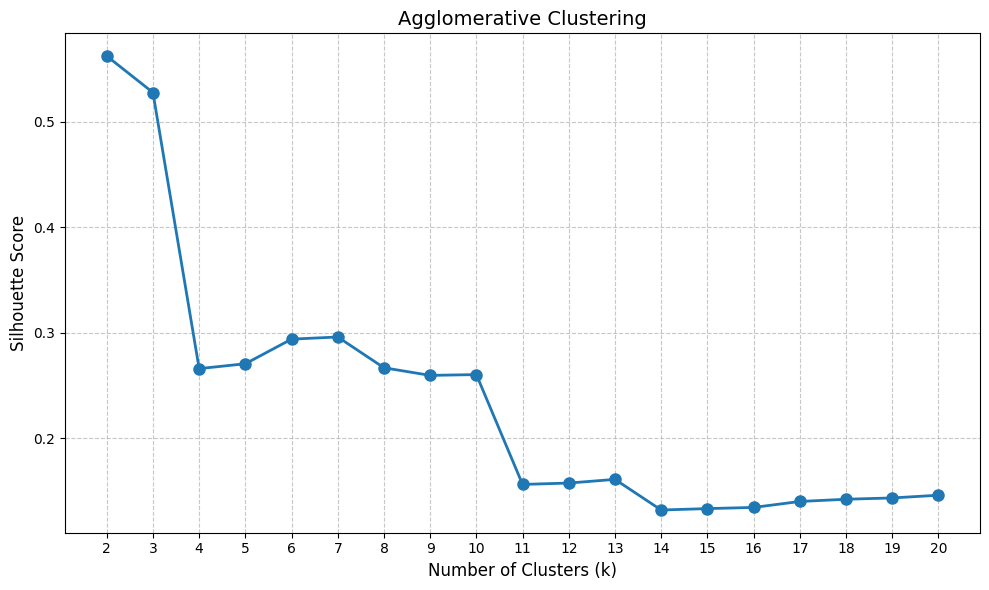

In [6]:
from src.model_selection import perform_agglomerative_analysis
metrics_df, fig = perform_agglomerative_analysis(data= robust_scaled_df, k_max = 20)

In [7]:
metrics_df

,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,None,0.562084,1398.693025,1.587270
1,3,None,0.527520,1473.143952,1.136227
2,4,None,0.265977,1452.440738,1.207005
3,5,None,0.270587,1492.182724,1.081228
4,6,None,0.293910,1555.536714,1.105408
5,7,None,0.295928,1581.362204,1.004506
6,8,None,0.266787,1596.736689,1.049408
7,9,None,0.259570,1511.176368,1.073387
8,10,None,0.260322,1439.706061,1.205641
9,11,None,0.156285,1388.866177,1.365468


## Conclusion:

It it possible to train a model with a good decency, Standard Scaler and Min Max Scaler are not good, (because our data as outliers). Although, robust scaler impoves our model Performance.

# Experiment 2

## Objective

Try to improve the model's performance by using a special imputer `MissForest`, and `Equal-Width-Binning` the values to reduce the outliers' effect.  

## Data Pipeline

1. Impute Missing Values, using `MissForest`;
2. Binnarize our features by using `Equal-Width-Binning`

In [ ]:
from src.preprocessing_pipelines.preprocessing_pipelines import missforest_imputation, equal_width_binning, robust_scale_dataframe
imputed_df, miss_forest_imputer = missforest_imputation(raw_data)
robust_scaled_df_imputed, robust_scaler = robust_scale_dataframe(imputed_df)

c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
 40%|████      | 2/5 [00:08<00:12,  4.33s/it]c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 40%|████      | 2/5 [00:16<00:24,  8.20s/it]
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform catego

## Model Training

### Kmeans - Imputed

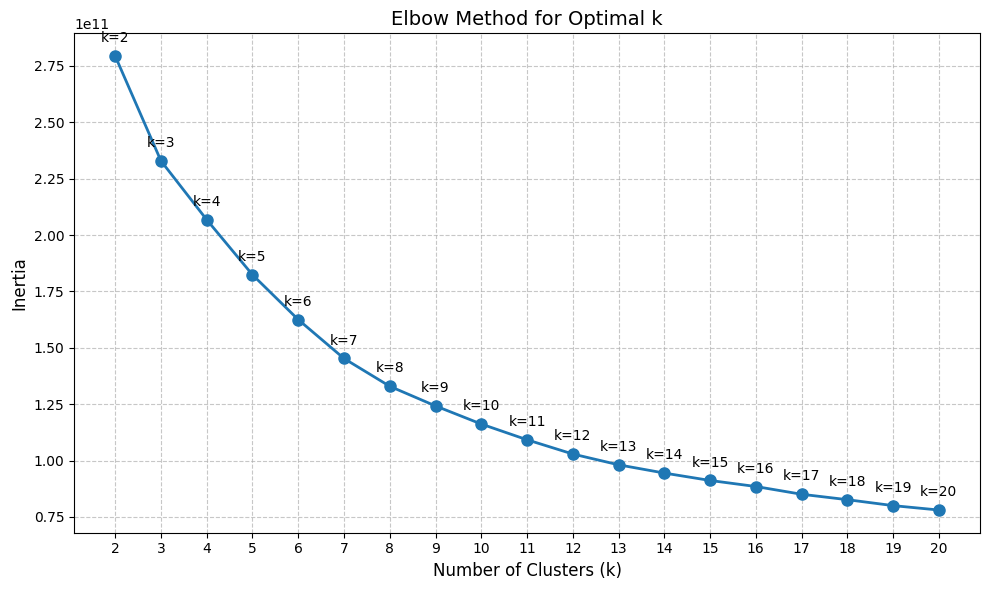

In [19]:
from src.model_selection import perform_kmeans_analysis
metrics_df, fig = perform_kmeans_analysis(data= imputed_df, k_max = 20)

In [20]:
metrics_df

,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,2.793894e+11,0.511731,3646.035833,1.241711
1,3,2.328880e+11,0.466027,3080.021343,1.189586
2,4,2.067957e+11,0.464611,2688.422413,1.092175
3,5,1.823840e+11,0.378136,2585.255300,1.298528
4,6,1.624984e+11,0.406993,2539.949035,1.183250
5,7,1.452588e+11,0.370264,2544.450347,1.116682
6,8,1.329285e+11,0.382312,2501.485833,1.103117
7,9,1.242157e+11,0.352749,2420.460001,1.113387
8,10,1.161878e+11,0.359885,2368.555029,1.048754
9,11,1.092077e+11,0.365816,2324.828002,1.049514


### K-means Imputed and Robust Scaled

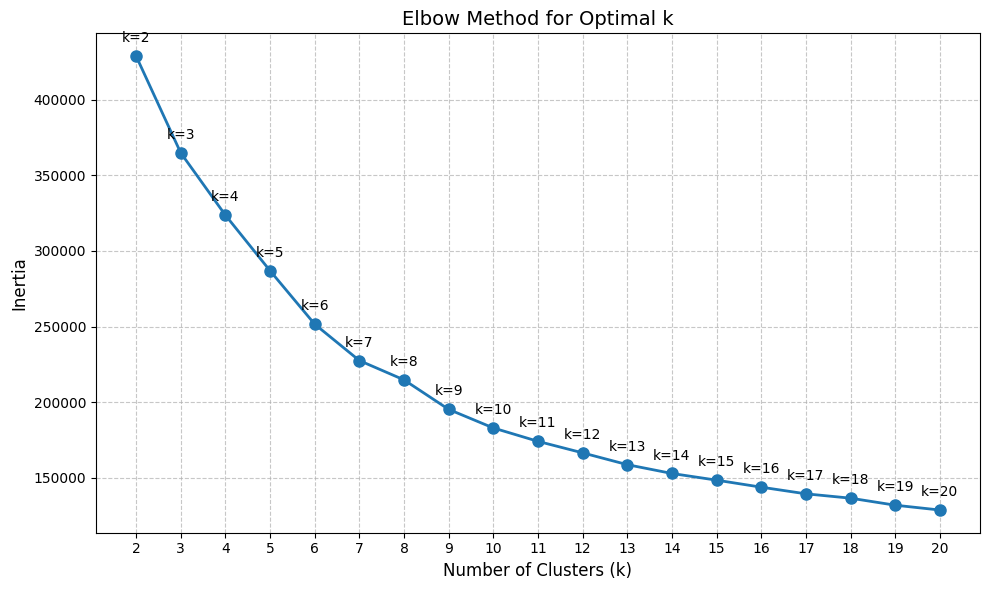

In [23]:
from src.model_selection import perform_kmeans_analysis
metrics_df, fig = perform_kmeans_analysis(data= robust_scaled_df_imputed, k_max = 20)

In [24]:
metrics_df

,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,428896.566722,0.664026,1682.562628,1.465466
1,3,364848.898770,0.560151,1774.157980,1.089296
2,4,323661.801702,0.303878,1712.604779,1.298929
3,5,286906.229531,0.250361,1735.329133,1.149711
4,6,251563.713254,0.269358,1834.436317,1.157217
5,7,227494.902449,0.292032,1847.936772,1.108955
6,8,214720.736315,0.286280,1753.990618,1.174890
7,9,195206.405207,0.293981,1799.704195,1.114483
8,10,182917.797200,0.280383,1773.751771,1.136718
9,11,174062.349374,0.287238,1722.880301,1.120641


### K-means Imputed Binnarized and Robust Scaled

In [25]:
from src.preprocessing_pipelines.preprocessing_pipelines import missforest_imputation, equal_width_binning, robust_scale_dataframe
imputed_df, miss_forest_imputer = missforest_imputation(raw_data)
columns = [x for x in imputed_df.columns]
imputed_df_entire_dataframe_7bins = equal_width_binning(imputed_df, columns, 7, True )

robust_scaled_df_imputed, robust_scaler = robust_scale_dataframe(imputed_df_entire_dataframe_7bins)

c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
 40%|████      | 2/5 [00:07<00:10,  3.60s/it]c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 40%|████      | 2/5 [00:13<00:19,  6.65s/it]
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform catego

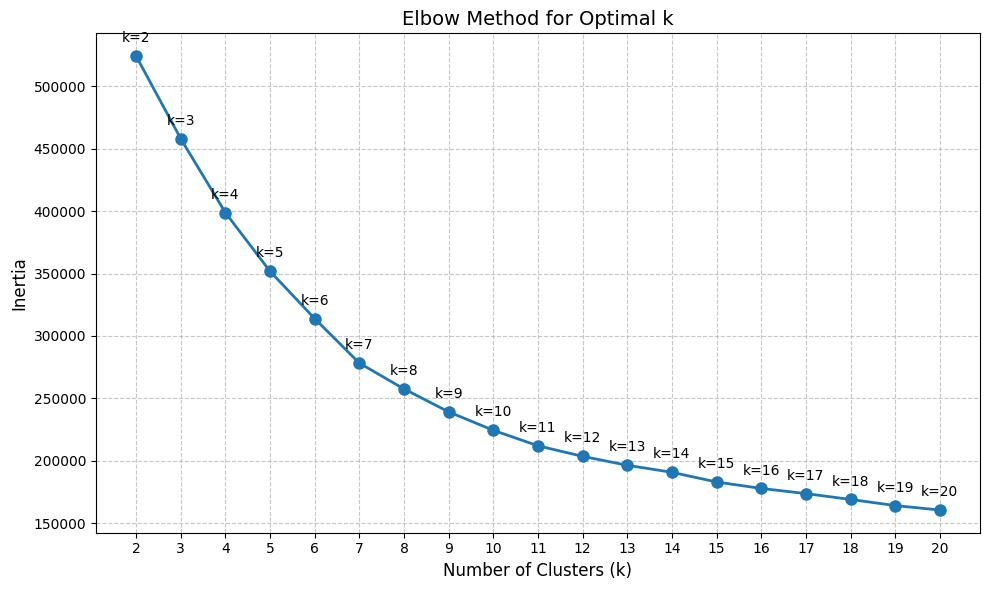

In [26]:
# Test without binning
from src.model_selection import perform_kmeans_analysis
metrics_df, fig = perform_kmeans_analysis(data= robust_scaled_df_imputed, k_max = 20)

In [27]:
metrics_df

,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,524171.494933,0.582174,1420.230980,1.582355
1,3,457983.611391,0.486367,1459.161813,1.196771
2,4,398762.827859,0.270225,1559.978353,1.379192
3,5,351835.360572,0.294295,1624.155773,1.135498
4,6,313909.333631,0.298081,1672.271031,1.231385
5,7,278319.153083,0.305517,1762.177266,1.144399
6,8,257607.735312,0.310172,1734.400492,1.048249
7,9,239253.035332,0.328670,1719.580436,1.042594
8,10,224511.577462,0.283965,1693.918828,1.121385
9,11,212096.599571,0.279951,1665.907573,1.113924


#### A Bigger number of Bins

In [36]:
from src.preprocessing_pipelines.preprocessing_pipelines import missforest_imputation, equal_width_binning, robust_scale_dataframe
imputed_df, miss_forest_imputer = missforest_imputation(raw_data)
columns = [x for x in imputed_df.columns]
imputed_df_entire_dataframe_20bins = equal_width_binning(imputed_df, columns, 20, True)

robust_scaled_df_imputed, robust_scaler = robust_scale_dataframe(imputed_df_entire_dataframe_20bins)

c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
 40%|████      | 2/5 [00:09<00:14,  4.84s/it]c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 40%|████      | 2/5 [00:14<00:21,  7.33s/it]
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform catego

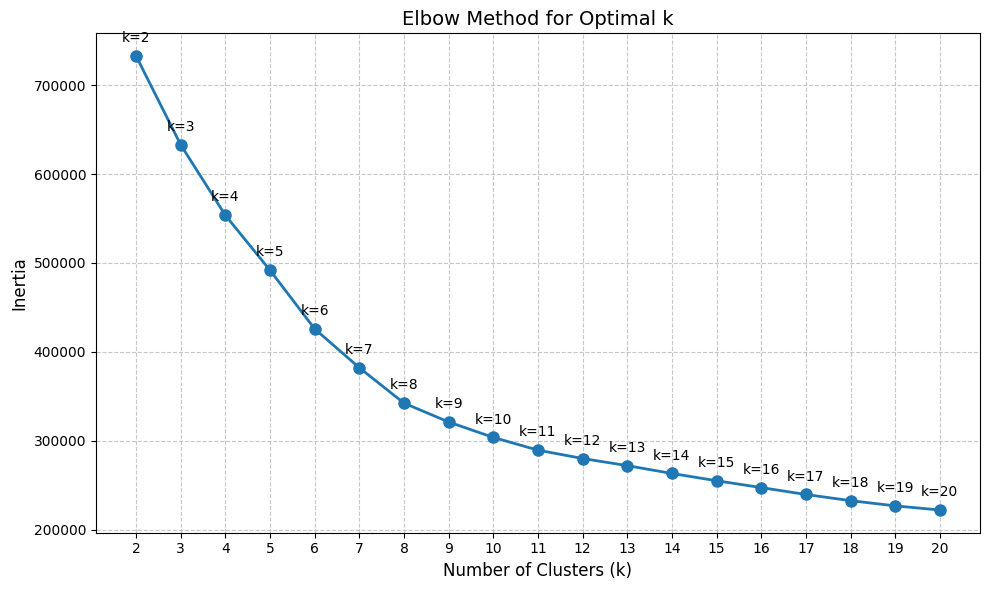

In [37]:
from src.model_selection import perform_kmeans_analysis
metrics_df, fig = perform_kmeans_analysis(data= robust_scaled_df_imputed, k_max = 20)

In [38]:
metrics_df

,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,732728.780376,0.450002,1974.966138,0.938108
1,3,632793.970684,0.376552,1849.788383,1.432329
2,4,553507.825249,0.343991,1836.831450,1.341012
3,5,491662.393294,0.331956,1832.033646,1.288103
4,6,425731.017073,0.338536,1969.438663,1.032946
5,7,382014.388068,0.338350,1999.378645,1.129942
6,8,342215.537260,0.345035,2061.404943,1.066232
7,9,321004.997839,0.350188,1996.543990,0.987749
8,10,303645.434803,0.297561,1932.750858,1.076435
9,11,289313.254478,0.290294,1869.722694,1.102060


Just Binnarized - Columns

In [39]:
from src.preprocessing_pipelines.preprocessing_pipelines import missforest_imputation, equal_width_binning, robust_scale_dataframe
imputed_df, miss_forest_imputer = missforest_imputation(raw_data)
columns = [x for x in imputed_df.columns]
imputed_df_dataframe_7bins = equal_width_binning(imputed_df, columns, 15, False )

robust_scaled_df_imputed, robust_scaler = robust_scale_dataframe(imputed_df_dataframe_7bins)

c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
 40%|████      | 2/5 [00:10<00:15,  5.17s/it]c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 40%|████      | 2/5 [00:14<00:22,  7.49s/it]
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform catego

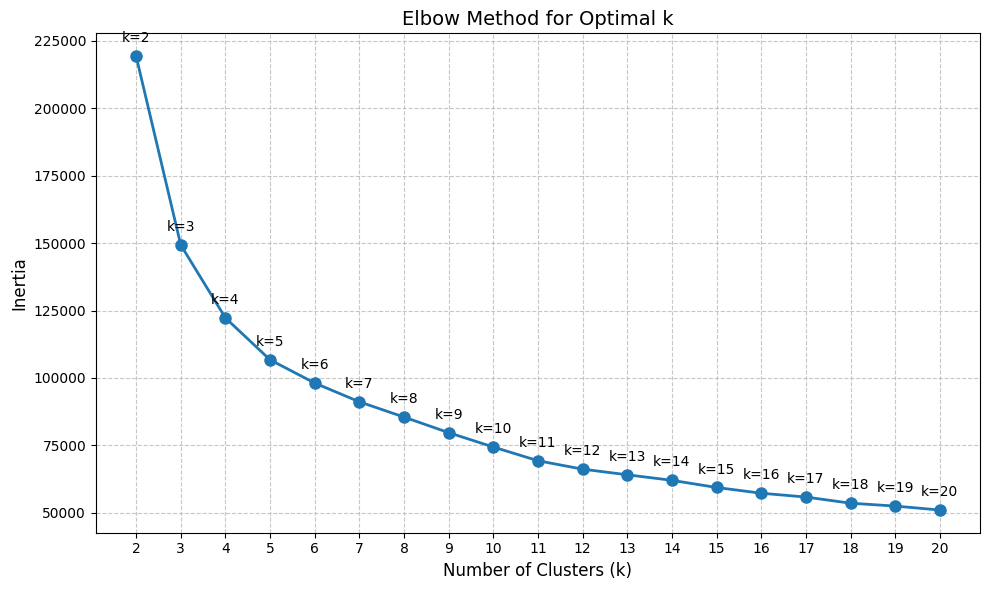

In [40]:
from src.model_selection import perform_kmeans_analysis
metrics_df, fig = perform_kmeans_analysis(data= robust_scaled_df_imputed, k_max = 20)

In [41]:
metrics_df

,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,219422.050761,0.456825,3634.076724,1.374835
1,3,149355.756579,0.491172,4767.779360,0.809642
2,4,122289.717769,0.423216,4541.576129,0.905848
3,5,106742.419223,0.380841,4227.589511,1.081072
4,6,98119.225965,0.374347,3836.095853,1.140767
5,7,91152.878414,0.374224,3554.581850,1.149788
6,8,85494.499501,0.363878,3332.615474,1.167470
7,9,79716.449217,0.315203,3208.060567,1.169836
8,10,74386.804679,0.328452,3126.766035,1.114085
9,11,69296.640292,0.323529,3086.106829,1.110493


## Conclusion:

* Binning seems to have no positive effect;
* MissForest seems to be a good imputation technique

# Experiment 3

## Objective

Test if we can create a minimum viable vanilla model

## Data Pipeline

* Drop Highly Correlated Features/ or PCA
* MissForest Imputation
* RobustScaler to Scaling

In [5]:
from src.preprocessing_pipelines.preprocessing_pipelines import missforest_imputation, drop_highly_correlated_features, robust_scale_dataframe

dataframe_without_correlated_features = drop_highly_correlated_features(raw_data, 0.85)

imputed_df_without_correlated, miss_forest_imputer = missforest_imputation(dataframe_without_correlated_features)

df_without_correlated_features_imputed_scaled, robust_scaler = robust_scale_dataframe(imputed_df_without_correlated)

c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
 40%|████      | 2/5 [00:13<00:20,  6.69s/it]c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 40%|████      | 2/5 [00:17<00:26,  8.94s/it]
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform catego

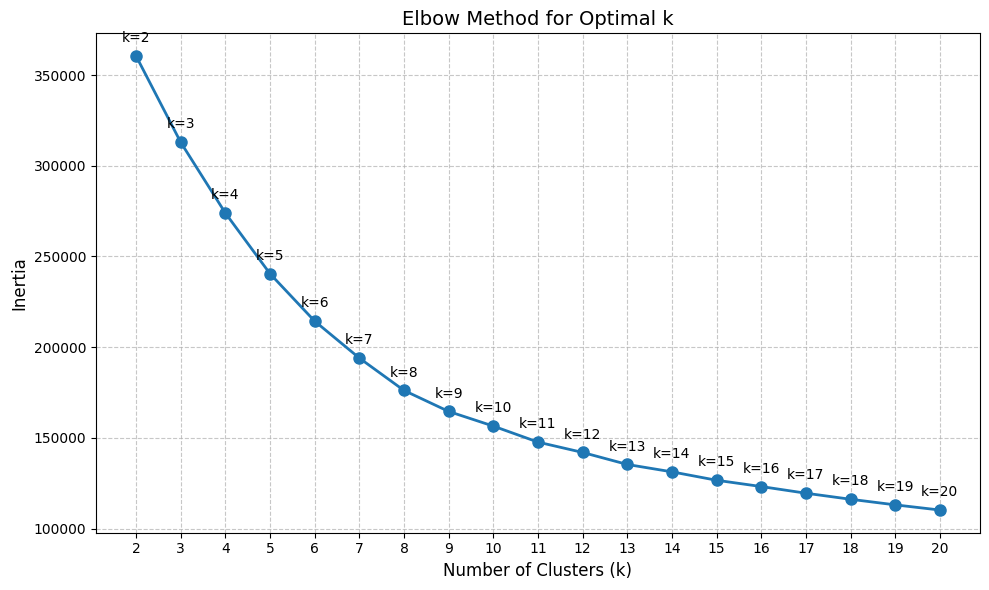

In [6]:
# Test without binning
from src.model_selection import perform_kmeans_analysis
metrics_df, fig = perform_kmeans_analysis(data= df_without_correlated_features_imputed_scaled, k_max = 20)

In [7]:
metrics_df

,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,360457.163306,0.776283,1797.633017,0.725810
1,3,312883.657316,0.395526,1715.565514,1.528352
2,4,273886.355603,0.309667,1730.996596,1.302432
3,5,240449.383703,0.279566,1789.600257,1.255003
4,6,214327.651416,0.302946,1824.005276,1.184228
5,7,193970.557808,0.310984,1835.757413,1.062169
6,8,176124.255229,0.318253,1862.268110,1.054183
7,9,164555.032838,0.301363,1822.379290,1.109251
8,10,156476.322541,0.309230,1754.599215,1.102572
9,11,147652.790507,0.312176,1726.738271,1.057912


The results for 2 cluster are good, but after that it decreasly significantly, now we can try to tune the threshold, or try another technique to avoid correlations (PCA)

c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|██████████| 5/5 [00:18<00:00,  3.63s/it]
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform`

,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,334145.922964,0.799392,1917.095755,0.689002
1,3,286770.724051,0.454420,1855.810157,1.264406
2,4,249491.954133,0.271887,1867.477504,1.369336
3,5,222029.426644,0.307048,1850.272368,1.142654
4,6,196073.457823,0.318747,1912.776817,1.171702
5,7,177306.097815,0.319439,1920.302338,1.078660
6,8,159242.697157,0.330332,1977.346438,1.043760
7,9,149480.942589,0.324664,1915.945060,1.034599
8,10,139422.286455,0.314139,1897.391087,1.068781
9,11,131883.081406,0.289907,1856.170578,1.110544


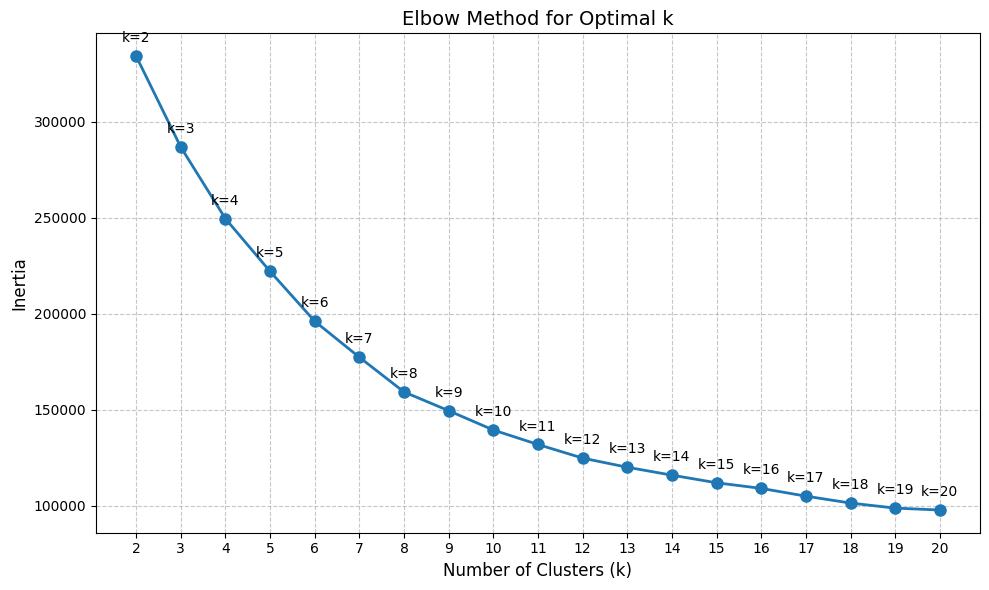

In [9]:
# Changing the correlation threshold
from src.preprocessing_pipelines.preprocessing_pipelines import missforest_imputation, drop_highly_correlated_features, robust_scale_dataframe
dataframe_without_correlated_features = drop_highly_correlated_features(raw_data, 0.70)
imputed_df_without_correlated, miss_forest_imputer = missforest_imputation(dataframe_without_correlated_features)
df_without_correlated_features_imputed_scaled, robust_scaler = robust_scale_dataframe(imputed_df_without_correlated)

from src.model_selection import perform_kmeans_analysis
metrics_df, fig = perform_kmeans_analysis(data= df_without_correlated_features_imputed_scaled, k_max = 20)

metrics_df

#### It scored a very good silhouette score when clusters = 2, altought it decreases a lot when the numbr of clusters gets bigger. Now, we must try another feature reduction technique

c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:27<00:00,  5.44s/it]
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting process "
100%|██████████| 5/5 [00:00<00:00, 30.19it/s]


,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,318383.201792,0.789542,2010.940386,0.711625
1,3,271048.213802,0.471934,1962.175859,1.213658
2,4,234168.582599,0.291106,1983.600166,1.307001
3,5,206367.477949,0.332260,1989.188956,1.092506
4,6,180440.190425,0.344793,2076.840994,1.104756
5,7,161515.137342,0.349721,2107.918308,0.996675
6,8,143711.371656,0.357891,2188.649973,0.984773
7,9,134007.988214,0.354221,2134.434951,0.976060
8,10,124162.891240,0.346119,2126.245466,0.991979
9,11,116691.242298,0.348943,2093.268920,0.963344


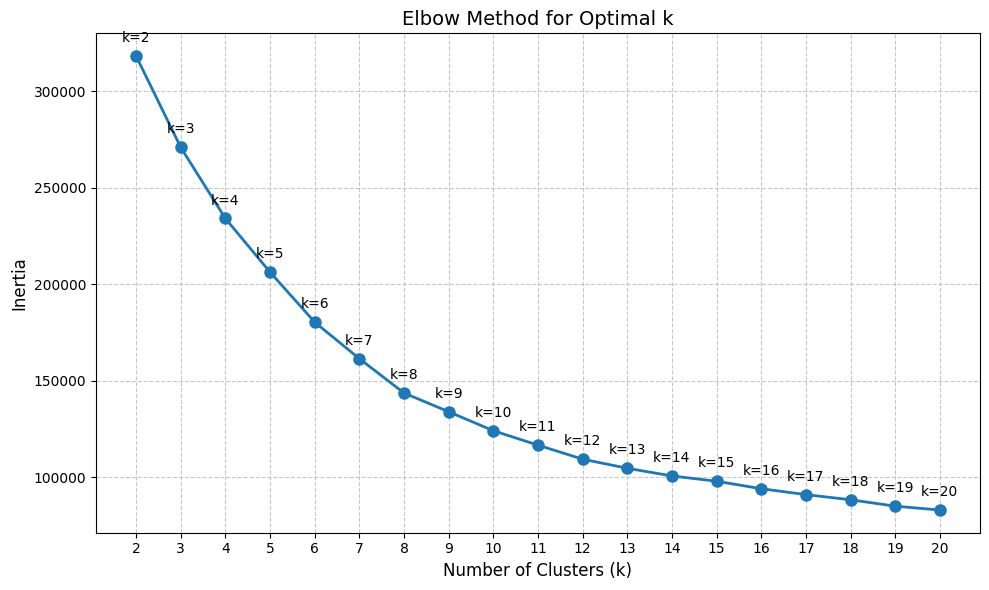

In [11]:
# Changing the to PCA
from sklearn.decomposition import PCA
from src.preprocessing_pipelines.preprocessing_pipelines import missforest_imputation, drop_highly_correlated_features, robust_scale_dataframe

imputed_df, miss_forest_imputer = missforest_imputation(dataframe_without_correlated_features)
imputed_df_scaled, robust_scaler = robust_scale_dataframe(imputed_df)
# Apply PCA to reduce dimensions while retaining 95% of explained variance
pca = PCA(n_components=0.95)
imputed_df_scaled_pca = pd.DataFrame(pca.fit_transform(imputed_df_scaled), index=imputed_df_scaled.index)

from src.model_selection import perform_kmeans_analysis
metrics_df, fig = perform_kmeans_analysis(data= imputed_df_scaled_pca, k_max = 20)
metrics_df

c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:21<00:00,  4.22s/it]
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting process "
100%|██████████| 5/5 [00:00<00:00, 27.17it/s]


,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,152595.199506,0.868261,4027.984239,0.641061
1,3,106010.009173,0.640048,4864.540967,0.756399
2,4,85519.057957,0.640722,4734.137111,0.740889
3,5,65340.053244,0.547938,5337.240323,0.714308
4,6,51664.723648,0.520285,5872.882851,0.690871
5,7,42593.526447,0.471106,6253.227866,0.682777
6,8,36140.654099,0.464840,6544.216749,0.690885
7,9,31733.315735,0.422179,6675.967383,0.717853
8,10,28547.451623,0.407943,6706.769975,0.743405
9,11,26159.573826,0.403719,6667.701197,0.722017


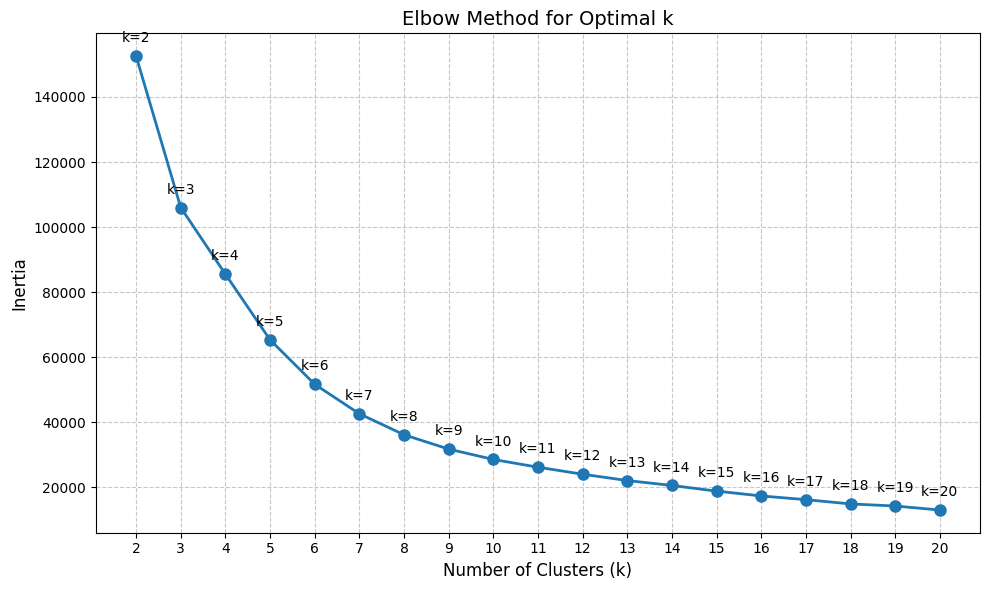

In [14]:
# Changing the to PCA
from sklearn.decomposition import PCA
from src.preprocessing_pipelines.preprocessing_pipelines import missforest_imputation, drop_highly_correlated_features, robust_scale_dataframe

imputed_df, miss_forest_imputer = missforest_imputation(dataframe_without_correlated_features)
imputed_df_scaled, robust_scaler = robust_scale_dataframe(imputed_df)
# Apply PCA to reduce dimensions while retaining 50% of explained variance
pca = PCA(n_components=0.50)
imputed_df_scaled_pca = pd.DataFrame(pca.fit_transform(imputed_df_scaled), index=imputed_df_scaled.index)

from src.model_selection import perform_kmeans_analysis
metrics_df, fig = perform_kmeans_analysis(data= imputed_df_scaled_pca, k_max = 20)
metrics_df

## Conclusion:

The PCA/remove highly correlated features seems not to be the best approach. Now we can tackle different ways to remove outliers.

# Experiment 4

## Objective

Try to remove outleirs

## Data Pipeline

* Impute missing values using missforest_imputation
* Scaling using Robust_scale_dataframe
* Check for methods to remove outliers
* Change for the mean/median

Feature tools for log

In [30]:
from src.preprocessing_pipelines.preprocessing_pipelines import missforest_imputation, drop_highly_correlated_features, robust_scale_dataframe

df_imputed, miss_forest_imputer = missforest_imputation(raw_data)

c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
 40%|████      | 2/5 [00:07<00:11,  3.99s/it]c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 40%|████      | 2/5 [00:11<00:17,  5.92s/it]
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform catego

In [31]:
import numpy as np
import pandas as pd

def apply_transformations(df, columns=None, epsilon=1e-10):
    """
    Apply various log and power transformations to specified columns in a dataframe.
    Returns a single dataframe with all transformations as new columns.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    columns : list, optional
        List of columns to transform. If None, transforms all numeric columns
    epsilon : float, optional
        Small constant to add to handle zeros and negative values
        
    Returns:
    --------
    pandas.DataFrame : Original dataframe with additional columns for each transformation
    """
    
    # Create a copy of the dataframe
    result_df = df.copy()
    
    # If no columns specified, use all numeric columns
    if columns is None:
        columns = result_df.select_dtypes(include=['float64', 'int64']).columns
    
    # Apply transformations
    for col in columns:
        # Log transformations
        # 1. Natural log transformation (ln(x + epsilon))
        result_df[f'{col}_ln'] = np.log(result_df[col] + epsilon)
        
        # 2. Log10 transformation
        result_df[f'{col}_log10'] = np.log10(result_df[col] + epsilon)
        
        # 3. Log1p transformation (ln(x + 1))
        result_df[f'{col}_log1p'] = np.log1p(result_df[col])
        
        # 4. Signed log transformation (maintains sign of original data)
        signs = np.sign(result_df[col])
        result_df[f'{col}_signed_log'] = signs * np.log(np.abs(result_df[col]) + epsilon)
        
        # 5. Box-Cox-like transformation for positive values
        result_df[f'{col}_boxcox'] = 0  # initialize with zeros
        positive_mask = result_df[col] > 0
        result_df.loc[positive_mask, f'{col}_boxcox'] = np.log(result_df.loc[positive_mask, col])
        
        # 6. Symmetrical log transformation
        result_df[f'{col}_symlog'] = np.sign(result_df[col]) * np.log1p(np.abs(result_df[col]))
        
        # Power transformations
        # 7. Square root transformation (preserving signs)
        result_df[f'{col}_sqrt'] = np.sign(result_df[col]) * np.sqrt(np.abs(result_df[col]))
        
        # 8. Cube root transformation (handles negative values naturally)
        result_df[f'{col}_cbrt'] = np.cbrt(result_df[col])
        
        # 9. Square transformation
        result_df[f'{col}_square'] = np.square(result_df[col])
        
        # 10. Inverse transformation (1/x)
        result_df[f'{col}_inverse'] = 1 / (result_df[col] + epsilon)
        
        # 11. Yeo-Johnson transformation (handles negative values)
        # For x ≥ 0: ((x + 1)^lambda - 1) / lambda if lambda ≠ 0, log(x + 1) if lambda = 0
        # For x < 0: -((-x + 1)^(2-lambda) - 1)/(2-lambda) if lambda ≠ 2, -log(-x + 1) if lambda = 2
        lambda_param = 0.5  # Can be optimized based on data
        pos_mask = result_df[col] >= 0
        neg_mask = ~pos_mask
        
        result_df[f'{col}_yeojohnson'] = result_df[col].copy()
        # Transform positive values
        result_df.loc[pos_mask, f'{col}_yeojohnson'] = ((np.power(result_df.loc[pos_mask, col] + 1, lambda_param) - 1) / 
                                                        lambda_param)
        # Transform negative values
        result_df.loc[neg_mask, f'{col}_yeojohnson'] = -(np.power(-result_df.loc[neg_mask, col] + 1, 2-lambda_param) - 1) / (2-lambda_param)
        
    return result_df

In [32]:
# Apply transformations
df_imputed_log_transform = apply_transformations(df_imputed)

# Scaling
df_imputed_log_transform_scaled, robust_scaler = robust_scale_dataframe(df_imputed_log_transform)

C:\Users\Marina\AppData\Local\Temp\ipykernel_9700\3985782957.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.71114838 8.07167686 7.82210367 ... 3.15267931 2.59954133 5.92079547]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_df.loc[positive_mask, f'{col}_boxcox'] = np.log(result_df.loc[positive_mask, col])
C:\Users\Marina\AppData\Local\Temp\ipykernel_9700\3985782957.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.20067047 -0.09531008  0.         ... -0.18232196 -0.18232196
 -0.40546461]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_df.loc[positive_mask, f'{col}_boxcox'] = np.log(result_df.loc[positive_mask, col])
C:\Users\Marina\AppData\Local\Temp\ipykernel_9700\3985782957.py:49: FutureWarning: Setting an i

In [14]:
def detect_outlier_columns(df, threshold=1.5):
    """
    Analyze each numeric column in a dataframe and identify which columns contain outliers.
    Uses the Interquartile Range (IQR) method with customizable threshold.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe to analyze
    threshold : float, optional (default=1.5)
        The IQR multiplier used to identify outliers
        Common values are 1.5 (moderate) or 3.0 (extreme)
        
    Returns:
    --------
    tuple : (columns_with_outliers, columns_without_outliers)
        Two lists of column names as strings
    """
    
    # Initialize lists to store results
    columns_with_outliers = []
    columns_without_outliers = []
    
    # Get numeric columns only
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    for column in numeric_columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate bounds
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Check if there are any outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        
        if len(outliers) > 0:
            columns_with_outliers.append(column)
        else:
            columns_without_outliers.append(column)
    
    return columns_with_outliers, columns_without_outliers


In [15]:
columns_with_outliers, columns_without_outliers = detect_outlier_columns(df_imputed_log_transform_scaled)

In [16]:
df_imputed_log_transform_scaled_without_outliers = df_imputed_log_transform_scaled[columns_without_outliers]

,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,102425.882395,0.379882,5922.193848,1.005232
1,3,77190.128063,0.375118,5391.249214,1.204095
2,4,58847.313243,0.405111,5643.442185,1.184474
3,5,46940.788665,0.433902,5872.806758,1.044047
4,6,39164.730462,0.451715,5985.602348,1.002758
5,7,34847.073612,0.473121,5790.080971,0.981663
6,8,31459.706716,0.457784,5634.230769,0.994857
7,9,28798.043069,0.454028,5488.297886,0.984587
8,10,26300.429541,0.448757,5435.505472,1.039346
9,11,24754.866415,0.438173,5252.611788,1.106908


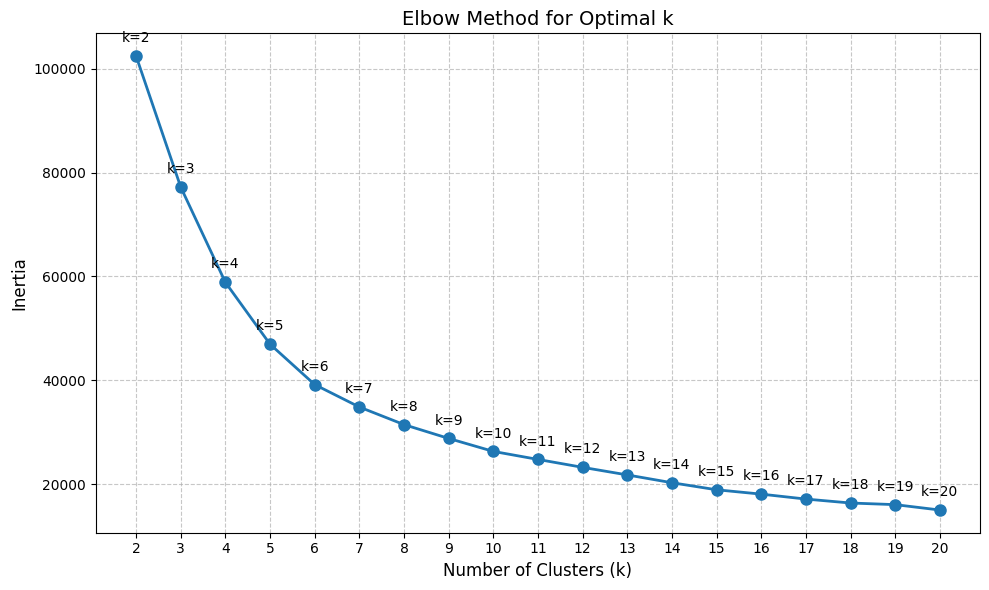

In [19]:
from src.model_selection import perform_kmeans_analysis
metrics_df, fig = perform_kmeans_analysis(data= df_imputed_log_transform_scaled_without_outliers, k_max = 20)

metrics_df

In [26]:
from src.model_selection import perform_dbscan_analysis

eps_range = np.linspace(0.1, 3.0, num=30)

metrics_df = perform_dbscan_analysis(data= df_imputed_log_transform_scaled_without_outliers, eps= eps_range, min_samples= 68)

metrics_df

,eps,min_samples,silhouette,calinski_harabasz,davies_bouldin
0,0.1,68,-0.014830,146.611020,0.875091
1,0.2,68,0.021641,702.547915,0.865003
2,0.3,68,-0.095792,1024.842345,0.922647
3,0.4,68,-0.054446,886.671310,0.938346
4,0.5,68,0.052364,1269.013125,0.904309
5,0.6,68,0.160920,1772.939331,1.068487
6,0.7,68,0.129524,1919.499978,1.066335
7,0.8,68,0.152355,1804.172765,1.082336
8,0.9,68,0.208038,2032.367632,1.165659
9,1.0,68,0.259744,2378.157072,1.127620


In [28]:
from src.model_selection import perform_dbscan_analysis

eps_range = np.linspace(0.1, 3.0, num=30)

metrics_df = perform_dbscan_analysis(data= df_imputed_log_transform_scaled_without_outliers, eps= eps_range, min_samples= (5))

metrics_df

,eps,min_samples,silhouette,calinski_harabasz,davies_bouldin
0,0.1,5,-0.272980,75.271430,1.037703
1,0.2,5,-0.197065,112.519535,1.078710
2,0.3,5,-0.133779,219.876740,1.104287
3,0.4,5,-0.001097,274.411911,1.100828
4,0.5,5,0.046586,535.038458,1.065682
5,0.6,5,0.095398,765.541985,1.338595
6,0.7,5,0.218541,982.984259,1.429652
7,0.8,5,0.270130,1466.123909,1.456084
8,0.9,5,0.312532,2241.891826,1.638737
9,1.0,5,0.320416,2434.257482,1.600499


### Testing without outliers removal

,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,4.043718e+26,0.965817,1.123420e+05,1.169946e-01
1,3,1.460947e+26,0.976056,1.633522e+05,8.828047e-02
2,4,6.289729e+25,0.997034,2.568604e+05,9.398285e-02
3,5,8.294681e+24,0.996707,1.475332e+06,1.066895e-01
4,6,1.197971e+24,0.999477,8.181753e+06,5.067901e-02
5,7,3.188952e+23,0.999835,2.561442e+07,1.936351e-02
6,8,6.775161e+20,0.999965,1.033338e+10,3.491191e-05
7,9,3.389960e+20,0.999982,1.806871e+10,3.475095e-05
8,10,8.398437e+17,0.999981,6.482194e+12,1.819898e-05
9,11,5.131939e+11,0.999888,9.546250e+18,4.490157e-08


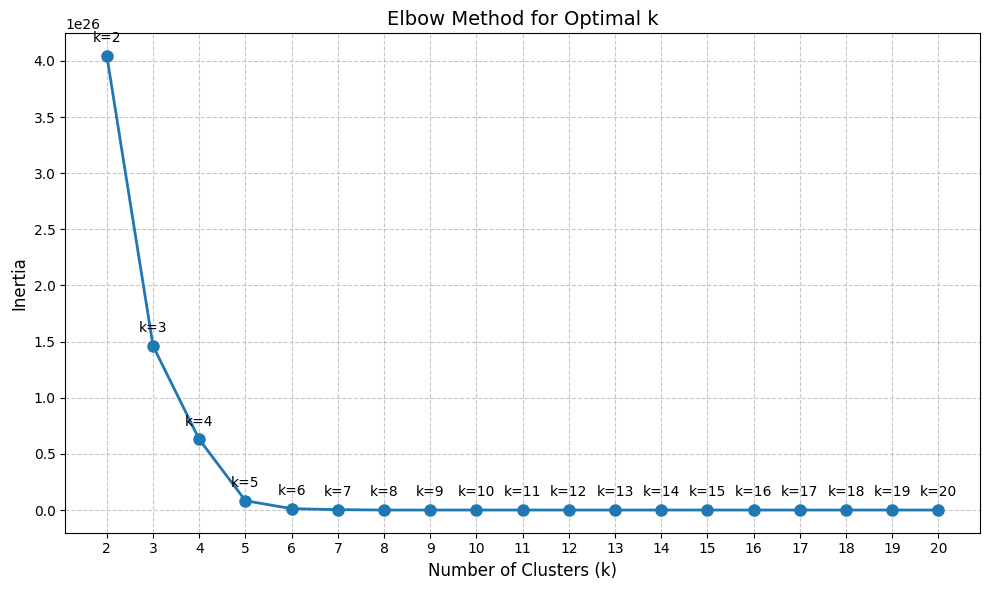

In [36]:
df_imputed_log_transform_scaled = df_imputed_log_transform_scaled.dropna()

metrics_df, fig = perform_kmeans_analysis(data= df_imputed_log_transform_scaled, k_max = 20)
metrics_df  

In [41]:
metrics_df.to_excel('k_means_full_dataset.xlsx')

#### Testing a second function to apply transformations

In [42]:
import numpy as np
import pandas as pd

def apply_transformations_v2(df, columns=None, epsilon=1e-10):
    """
    Apply various log and power transformations to specified columns in a dataframe.
    Returns a single dataframe with all transformations as new columns.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    columns : list, optional
        List of columns to transform. If None, transforms all numeric columns
    epsilon : float, optional
        Small constant to add to handle zeros and negative values
        
    Returns:
    --------
    pandas.DataFrame : Original dataframe with additional columns for each transformation
    """
    
    # Create a copy of the dataframe
    result_df = df.copy()
    
    # If no columns specified, use all numeric columns
    if columns is None:
        columns = result_df.select_dtypes(include=['float64', 'int64']).columns
    
    # Apply transformations
    for col in columns:
        # Store column values for reuse
        col_values = result_df[col].values
        abs_values = np.abs(col_values)
        signs = np.sign(col_values)
        
        # Log transformations
        # 1. Natural log transformation (ln(x + epsilon))
        result_df[f'{col}_ln'] = np.log(abs_values + epsilon)
        
        # 2. Log10 transformation
        result_df[f'{col}_log10'] = np.log10(abs_values + epsilon)
        
        # 3. Log1p transformation (ln(x + 1))
        result_df[f'{col}_log1p'] = np.log1p(abs_values)
        
        # 4. Signed log transformation (maintains sign of original data)
        result_df[f'{col}_signed_log'] = signs * np.log(abs_values + epsilon)
        
        # 5. Box-Cox-like transformation for positive values
        result_df[f'{col}_boxcox'] = np.zeros_like(col_values)
        positive_mask = col_values > 0
        result_df.loc[positive_mask, f'{col}_boxcox'] = np.log(result_df.loc[positive_mask, col])
        
        # 6. Symmetrical log transformation
        result_df[f'{col}_symlog'] = signs * np.log1p(abs_values)
        
        # Power transformations
        # 7. Square root transformation (preserving signs)
        result_df[f'{col}_sqrt'] = signs * np.sqrt(abs_values)
        
        # 8. Cube root transformation (handles negative values naturally)
        result_df[f'{col}_cbrt'] = np.cbrt(col_values)
        
        # 9. Square transformation
        result_df[f'{col}_square'] = np.square(col_values)
        
        # 10. Inverse transformation (1/x)
        with np.errstate(divide='ignore', invalid='ignore'):
            inverse_values = np.where(abs_values < epsilon, 
                                    signs * (1/epsilon), 
                                    signs * (1/(abs_values + epsilon)))
        result_df[f'{col}_inverse'] = inverse_values
        
        # 11. Yeo-Johnson transformation
        lambda_param = 0.5
        pos_mask = col_values >= 0
        neg_mask = ~pos_mask
        
        result_df[f'{col}_yeojohnson'] = np.zeros_like(col_values)
        
        # Transform positive values
        pos_values = ((np.power(col_values[pos_mask] + 1, lambda_param) - 1) / lambda_param)
        result_df.loc[pos_mask, f'{col}_yeojohnson'] = pos_values
        
        # Transform negative values
        neg_values = -(np.power(-col_values[neg_mask] + 1, 2-lambda_param) - 1) / (2-lambda_param)
        result_df.loc[neg_mask, f'{col}_yeojohnson'] = neg_values
        
    return result_df

In [43]:
from src.preprocessing_pipelines.preprocessing_pipelines import missforest_imputation, drop_highly_correlated_features, robust_scale_dataframe
df_imputed, miss_forest_imputer = missforest_imputation(raw_data)

# Apply transformations
df_imputed_log_and_power_transform = apply_transformations_v2(df_imputed)

# Scaling
df_imputed_log_and_power_transform_scaled, robust_scaler = robust_scale_dataframe(df_imputed_log_and_power_transform)

c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
 40%|████      | 2/5 [00:08<00:12,  4.09s/it]c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:303: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:453: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 40%|████      | 2/5 [00:11<00:17,  5.86s/it]
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\missforest\missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform catego

,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,6.730335e+10,0.999486,7.418794e+04,0.000266
1,3,2.255103e+10,0.998148,1.195719e+05,0.042274
2,4,5.768336e+09,0.997092,3.202815e+05,0.215806
3,5,3.469631e+09,0.996472,4.007931e+05,0.226819
4,6,1.909819e+09,0.994583,5.839030e+05,0.261662
5,7,1.159818e+09,0.994841,8.021129e+05,0.144610
6,8,9.965088e+08,0.978659,8.003177e+05,0.204867
7,9,8.480149e+08,0.980382,8.230057e+05,0.196101
8,10,7.013635e+08,0.980196,8.846348e+05,0.213761
9,11,5.901456e+08,0.983449,9.462791e+05,0.202599


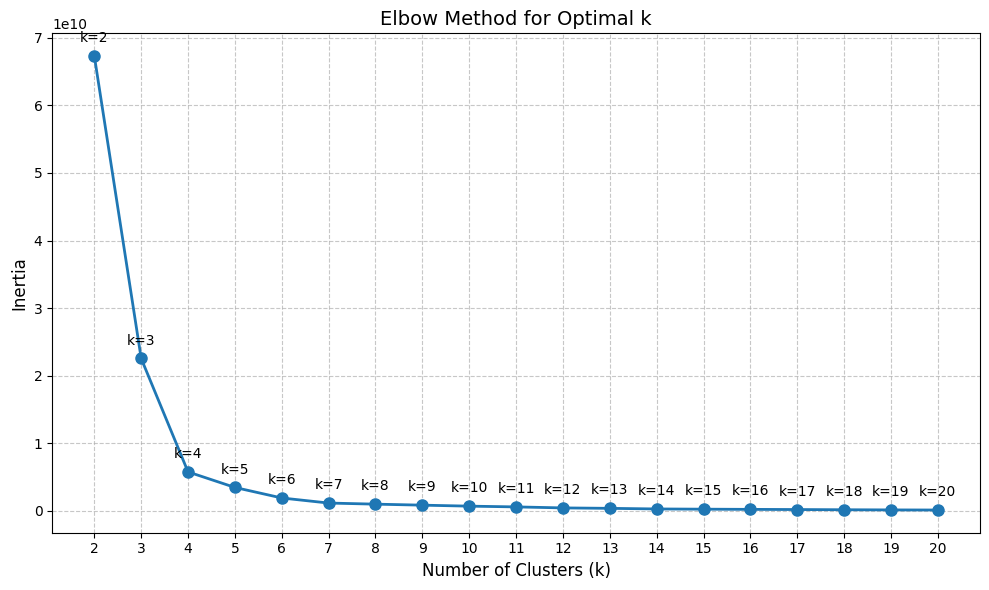

In [48]:
metrics_df, fig = perform_kmeans_analysis(data= df_imputed_log_and_power_transform_scaled, k_max = 20)
metrics_df 

In [49]:
import pandas as pd
import numpy as np

def analyze_clusters(raw_data: pd.DataFrame, treated_data: pd.DataFrame, clustering_algorithm) -> pd.DataFrame:
    """
    Perform descriptive analysis of clusters on the original dataset.

    Parameters:
        raw_data (pd.DataFrame): The original dataset, including missing values.
        treated_data (pd.DataFrame): The cleaned and preprocessed dataset used for clustering.
        clustering_algorithm: A clustering algorithm instance (e.g., KMeans).
    
    Returns:
        pd.DataFrame: A summary DataFrame with descriptive statistics for each cluster.
    """
    # Perform clustering on the treated data
    clustering_algorithm.fit(treated_data)
    labels = clustering_algorithm.labels_
    
    # Add cluster labels to the original data
    raw_data_with_clusters = raw_data.copy()
    raw_data_with_clusters['cluster'] = labels
    
    # Compute descriptive statistics for each cluster
    summary = raw_data_with_clusters.groupby('cluster').agg({
        column: ['mean', 'median', 'std', 'min', 'max', 'count'] for column in raw_data.columns if column != 'cluster'
    })
    
    # Flatten multi-level column index
    summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
    
    return summary


In [50]:
from sklearn.cluster import KMeans
k_means_n_4_descriptive = analyze_clusters(
    raw_data= raw_data, treated_data= df_imputed_log_and_power_transform_scaled, clustering_algorithm = KMeans(n_clusters= 4))

In [54]:
k_means_n_4_descriptive.to_excel('k_means_n_4_descriptive.xlsx')

In [52]:
from sklearn.cluster import KMeans
k_means_n_6_descriptive = analyze_clusters(
    raw_data= raw_data, treated_data= df_imputed_log_and_power_transform_scaled, clustering_algorithm = KMeans(n_clusters= 6))

In [53]:
k_means_n_6_descriptive

,BALANCE_mean,BALANCE_median,BALANCE_std,BALANCE_min,BALANCE_max,BALANCE_count,BALANCE_FREQUENCY_mean,BALANCE_FREQUENCY_median,BALANCE_FREQUENCY_std,BALANCE_FREQUENCY_min,...,PRC_FULL_PAYMENT_std,PRC_FULL_PAYMENT_min,PRC_FULL_PAYMENT_max,PRC_FULL_PAYMENT_count,TENURE_mean,TENURE_median,TENURE_std,TENURE_min,TENURE_max,TENURE_count
cluster,,,,,,,,,,,,,,,,,,,,,
0,1565.858903,874.800721,2082.006459,0.000000,19043.138560,8937,0.877880,1.000000,0.236205,0.000000,...,0.292642,0.0,1.000000,8937,11.517288,12.0,1.338333,6,12,8937
1,0.000199,0.000199,NaN,0.000199,0.000199,1,0.090909,0.090909,NaN,0.090909,...,NaN,0.0,0.000000,1,12.000000,12.0,NaN,12,12,1
2,0.001216,0.001214,0.000072,0.001146,0.001289,3,0.151515,0.181818,0.052486,0.090909,...,0.104973,0.0,0.181818,3,12.000000,12.0,0.000000,12,12,3
3,2256.292502,1364.528932,2809.066306,1.355556,5402.993017,3,0.848485,0.818182,0.138866,0.727273,...,0.072169,0.0,0.125000,3,11.666667,12.0,0.577350,11,12,3
4,399.930253,545.767741,341.327255,9.910791,644.112226,3,0.666667,0.545455,0.292232,0.454545,...,0.288675,0.0,0.500000,3,12.000000,12.0,0.000000,12,12,3
5,0.007050,0.006651,0.002458,0.004816,0.009684,3,0.290043,0.181818,0.222049,0.142857,...,0.192450,0.0,0.333333,3,10.333333,12.0,2.886751,7,12,3


In [56]:
from src.model_selection import perform_hdbscan_analysis

min_cluster_sizes = range(10, 50, 10)  # Testing 10, 20, 30, 40
min_samples_range = range(5, 25, 5)    # Testing 5, 10, 15, 20

metrics_df = perform_hdbscan_analysis(data= df_imputed_log_and_power_transform_scaled, 
    min_cluster_sizes= min_cluster_sizes, 
    min_samples_range= min_samples_range,
)    
metrics_df 

c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Marina\Desktop\market_campaing_clustering\.venv\lib\site-packages\sklea

,min_cluster_size,min_samples,n_clusters,n_noise,silhouette,relative_validity
0,10,5,32,1736,-0.032771,0.020569
1,10,10,25,2171,-0.074605,0.018002
2,20,5,21,1810,-0.043238,0.018508
3,20,10,21,2167,-0.073117,0.017171
4,20,15,21,2417,-0.093492,0.015162
5,20,20,17,2554,-0.101460,0.020794
6,30,5,19,1819,-0.042287,0.022020
7,30,10,16,2140,-0.071981,0.019551
8,30,15,15,2356,-0.086870,0.018342
9,30,20,12,2432,-0.088991,0.161821


## Conclusion:

It it possible to train a model with a good decency, Standard Scaler and Min Max Scaler are not good, (because our data as outliers). Although, robust scaler impoves our model Performance.

# Experiment 5

## Objective

Test if we can create a minimum viable vanilla model

## Data Pipeline

Just `drop_null_values`, and `scale_values`

## Conclusion:

It it possible to train a model with a good decency, Standard Scaler and Min Max Scaler are not good, (because our data as outliers). Although, robust scaler impoves our model Performance.